In [46]:
import matplotlib.pyplot as plt
import numpy as np
import filter
import os
import sys

# load all measurements
measurements = []
folder_path = os.path.join('..', 'RawMeasurements')

for filename in os.listdir(folder_path):
    if filename.endswith('.npz'):
        filepath = os.path.join(folder_path, filename)
        data = np.load(filepath)
        measurements.append(data)
        

In [47]:
""" print(len(measurements), 'measurements loaded')
#print(len(measurements[0]))
#print(measurements[0]['data'].shape)
sample = 1
index = 0
file = 0
timestamp = measurements[file]['data'][sample][index]
print('timestamp:', timestamp) """

" print(len(measurements), 'measurements loaded')\n#print(len(measurements[0]))\n#print(measurements[0]['data'].shape)\nsample = 1\nindex = 0\nfile = 0\ntimestamp = measurements[file]['data'][sample][index]\nprint('timestamp:', timestamp) "

In [48]:

no_activity = []
# get all measurements without activity, files with "ingen"
for filename in os.listdir(folder_path):
    if "ingen" in filename:
        no_activity.append(np.load(os.path.join(folder_path, filename)))
        print('no activity:', filename)

""" print(len(no_activity), 'no activity measurements loaded')
#print the heads of the measurements
for file in no_activity:
    print(file['data'][:1]) """
import filter  # Ensure filter is imported as a module


test = filter.generate_filter(fs=650)
filtered_no_activity = []

trial = []
for file in no_activity:
    data = file['data']
    timestamp = data[:, 0]
    sensor1 = filter.array_run(data[:,1], test)
    sensor2 = filter.array_run(data[:,2], test)
    up = data[:, 3]
    down = data[:, 4]
    trial.append(np.column_stack((timestamp, sensor1, sensor2, up, down)))
filtered_no_activity = trial



no activity: ingenAktivitet.npz
no activity: ingenAktivitet1.npz
no activity: ingenAktivitetDingler.npz
no activity: ingenAktivitetDingler1.npz


filtered_no_activity: 4


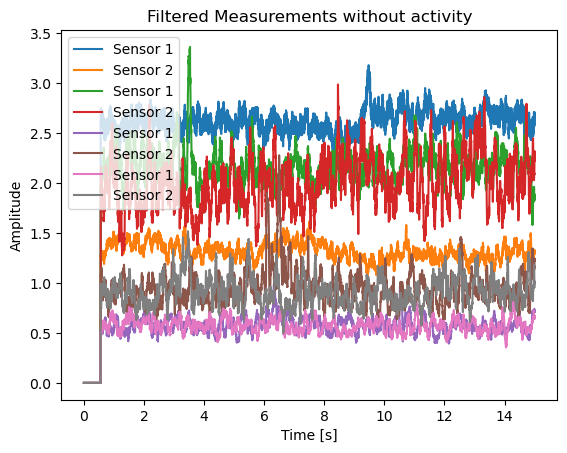

In [49]:
print('filtered_no_activity:', len(filtered_no_activity))

# Plot all measurements without activity
for file in filtered_no_activity:
    plt.plot(file[:, 0], file[:, 1], label='Sensor 1')
    plt.plot(file[:, 0], file[:, 2], label='Sensor 2')
    plt.legend()
    plt.title('Filtered Measurements without activity')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
plt.show()
    #plt.plot(file[:, 0], file[:, 3], label='Up')
    #plt.plot(file[:, 0], file[:, 4], label='Down')
    

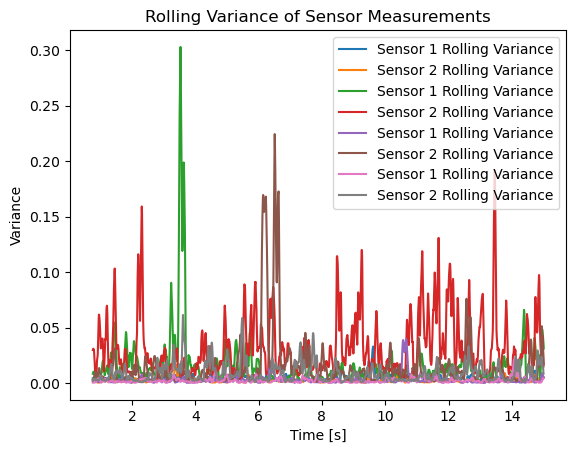

no_activity_features: [[0.006488373535834087, 0.014541195112581066, 1.4872558345027678, 1.2923399062221113, -0.008052821576746978, 0.19491592828065651]]


' variance of acceleration\nelbow angle\n '

In [50]:
#plot the variance of the sensor measurements for both sensors
import pandas as pd
window_size = 100
for file in filtered_no_activity:
    timestamp = file[400:, 0]
    sensor1 = file[400:, 1]
    sensor2 = file[400:, 2]

    rolling_var_sensor1 = pd.Series(sensor1).rolling(window=window_size).var()
    rolling_var_sensor2 = pd.Series(sensor2).rolling(window=window_size).var()
    
    plt.plot(timestamp, rolling_var_sensor1, label='Sensor 1 Rolling Variance')
    plt.plot(timestamp, rolling_var_sensor2, label='Sensor 2 Rolling Variance')
    plt.legend()
    plt.title('Rolling Variance of Sensor Measurements')
    plt.xlabel('Time [s]')
    plt.ylabel('Variance')

plt.show()

#calculate the mean of the rolling variance for both sensors [400:, 1] and [400:, 2]
no_activity_features = []
mean_var_sensor1 = 0
mean_var_sensor2 = 0
mean_mean_sensor1 = 0
mean_mean_sensor2 = 0

for file in filtered_no_activity:
    timestamp = file[400:, 0]
    sensor1 = file[400:, 1]
    sensor2 = file[400:, 2]

    rolling_var_sensor1 = pd.Series(sensor1).rolling(window=window_size).var()
    rolling_var_sensor2 = pd.Series(sensor2).rolling(window=window_size).var()
    #calculate the rolling mean
    rolling_mean_sensor1 = pd.Series(sensor1).rolling(window=window_size).mean()
    rolling_mean_sensor2 = pd.Series(sensor2).rolling(window=window_size).mean()

    
    mean_var_sensor1 += np.mean(rolling_var_sensor1)
    mean_var_sensor2 += np.mean(rolling_var_sensor2)
    mean_mean_sensor1 += np.mean(rolling_mean_sensor1)
    mean_mean_sensor2 += np.mean(rolling_mean_sensor2)

no_activity_features.append([mean_var_sensor1/len(filtered_no_activity), mean_var_sensor2/len(filtered_no_activity), mean_mean_sensor1/len(filtered_no_activity), mean_mean_sensor2/len(filtered_no_activity),
                    (mean_var_sensor1/len(filtered_no_activity)) - (mean_var_sensor2/len(filtered_no_activity)), (mean_mean_sensor1/len(filtered_no_activity)) - (mean_mean_sensor2/len(filtered_no_activity))])
print('no_activity_features:', no_activity_features)
# the features are: [mean_var_sensor1, mean_var_sensor2, mean_mean_sensor1, mean_mean_sensor2, difference in variance, difference in mean]
   
   




""" variance of acceleration
elbow angle
 """

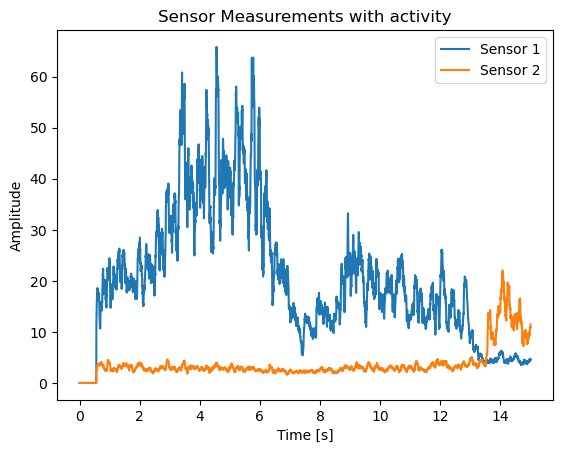

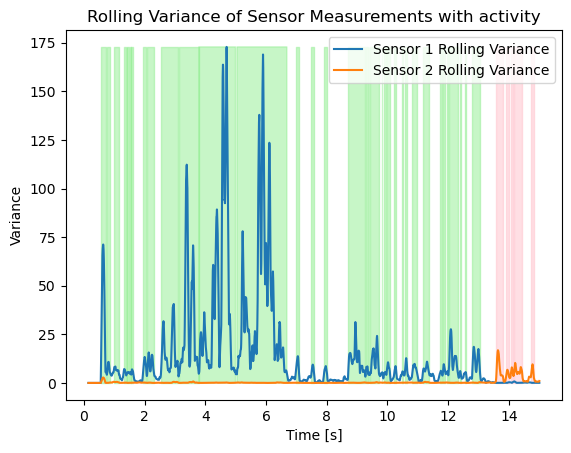

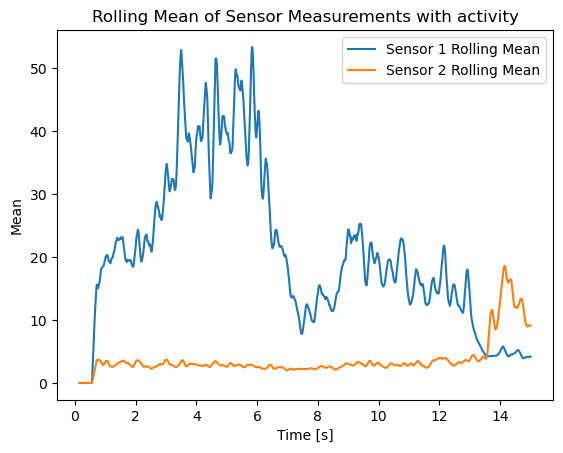

In [51]:
for filename in os.listdir(folder_path):
    if filename == "BevægelseVertikaltFlexEx.npz":
        data = np.load(os.path.join(folder_path, filename))

# Plot the sensors from data
data = data['data']
timestamp = data[:, 0]
sensor1 = filter.array_run(data[:, 1], test)
sensor2 = filter.array_run(data[:, 2], test)
up = data[:, 3]
down = data[:, 4]
diff_threshold = 5

plt.plot(timestamp, sensor1, label='Sensor 1')
plt.plot(timestamp, sensor2, label='Sensor 2')
plt.legend()
plt.title('Sensor Measurements with activity')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

# Plot the rolling variance of the sensor measurements for both sensors
rolling_var_sensor1 = pd.Series(sensor1).rolling(window=window_size).var()
rolling_var_sensor2 = pd.Series(sensor2).rolling(window=window_size).var()
diff = rolling_var_sensor1 - rolling_var_sensor2

plt.plot(timestamp, rolling_var_sensor1, label='Sensor 1 Rolling Variance')
plt.plot(timestamp, rolling_var_sensor2, label='Sensor 2 Rolling Variance')

# Color the background based on the diff condition
plt.fill_between(timestamp, rolling_var_sensor1.min(), rolling_var_sensor1.max(), where=(diff > diff_threshold), color='lightgreen', alpha=0.5)
plt.fill_between(timestamp, rolling_var_sensor1.min(), rolling_var_sensor1.max(), where=(diff < -diff_threshold+2), color='pink', alpha=0.5)

plt.legend()
plt.title('Rolling Variance of Sensor Measurements with activity')
plt.xlabel('Time [s]')
plt.ylabel('Variance')
plt.show()

# plot the rolling average of the sensor measurements for both sensors
rolling_mean_sensor1 = pd.Series(sensor1).rolling(window=window_size).mean()
rolling_mean_sensor2 = pd.Series(sensor2).rolling(window=window_size).mean()

plt.plot(timestamp, rolling_mean_sensor1, label='Sensor 1 Rolling Mean')
plt.plot(timestamp, rolling_mean_sensor2, label='Sensor 2 Rolling Mean')
plt.legend()
plt.title('Rolling Mean of Sensor Measurements with activity')
plt.xlabel('Time [s]')
plt.ylabel('Mean')
plt.show()



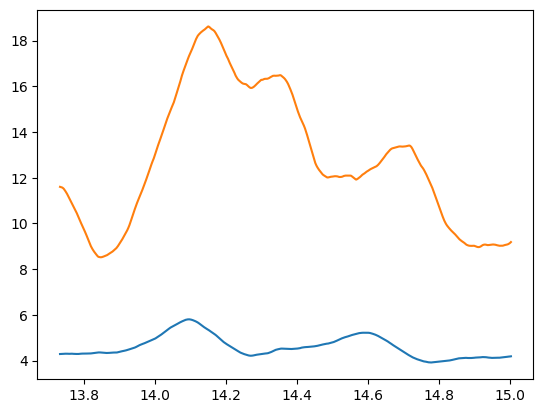

6800 6800 6800


In [65]:
for filename in os.listdir(folder_path):
    if filename == "BevægelseVertikaltFlexEx.npz":
        data = np.load(os.path.join(folder_path, filename))

# Plot the sensors from data
data = data['data']
cutoff = 0
timestamp = data[cutoff:, 0]
sensor1 = filter.array_run(data[cutoff:, 1], test)
sensor2 = filter.array_run(data[cutoff:, 2], test)
up = data[cutoff:, 3]
down = data[cutoff:, 4]

# Plot the rolling variance of the sensor measurements for both sensors
features_Flex = []
features_Ex = []
rolling_var_sensor1 = pd.Series(sensor1).rolling(window=window_size).var()
rolling_var_sensor2 = pd.Series(sensor2).rolling(window=window_size).var()
rolling_mean_sensor1 = pd.Series(sensor1).rolling(window=window_size).mean()
rolling_mean_sensor2 = pd.Series(sensor2).rolling(window=window_size).mean()



plt.plot(timestamp[9000:], rolling_mean_sensor1[9000:], label='Sensor 1 Rolling Variance')
plt.plot(timestamp[9000:], rolling_mean_sensor2[9000:], label='Sensor 2 Rolling Variance')

rolling_var_sensor1_Ex = rolling_var_sensor1[9000:]
rolling_var_sensor2_Ex = rolling_var_sensor2[9000:]
rolling_mean_sensor1_Ex = rolling_mean_sensor1[9000:]
rolling_mean_sensor2_Ex = rolling_mean_sensor2[9000:]
mean_var_sensor1_Ex = np.mean(rolling_var_sensor1_Ex)
mean_var_sensor2_Ex = np.mean(rolling_var_sensor2_Ex)
mean_mean_sensor1_Ex = np.mean(rolling_mean_sensor1_Ex)
mean_mean_sensor2_Ex = np.mean(rolling_mean_sensor2_Ex)
diff_var_Ex = mean_var_sensor1_Ex - mean_var_sensor2_Ex
diff_mean_Ex = mean_mean_sensor1_Ex - mean_mean_sensor2_Ex
features_Ex.append([mean_var_sensor1_Ex, mean_var_sensor2_Ex, mean_mean_sensor1_Ex, mean_mean_sensor2_Ex, diff_var_Ex, diff_mean_Ex])





# Color the background based on the diff condition
plt.show()
rolling_var_sensor1 = rolling_var_sensor1[800:7600]
rolling_var_sensor2 = rolling_var_sensor2[800:7600]
rolling_mean_sensor1 = rolling_mean_sensor1[800:7600]
rolling_mean_sensor2 = rolling_mean_sensor2[800:7600]

timestamp = timestamp[800:7600]
print(len(rolling_var_sensor1), len(rolling_var_sensor2), len(timestamp))



mean_var_sensor1 = np.mean(rolling_var_sensor1)
mean_var_sensor2 = np.mean(rolling_var_sensor2)
mean_mean_sensor1 = np.mean(rolling_mean_sensor1)
mean_mean_sensor2 = np.mean(rolling_mean_sensor2)
diff_var = mean_var_sensor1 - mean_var_sensor2
diff_mean = mean_mean_sensor1 - mean_mean_sensor2
features_Flex.append([mean_var_sensor1, mean_var_sensor2, mean_mean_sensor1, mean_mean_sensor2, diff_var, diff_mean])

# loop through the rolling var and mean and append the features for each 100 samples
for i in range(0, len(rolling_var_sensor1), 100):
    mean_var_sensor1 = np.mean(rolling_var_sensor1[i:i+100])
    mean_var_sensor2 = np.mean(rolling_var_sensor2[i:i+100])
    mean_mean_sensor1 = np.mean(rolling_mean_sensor1[i:i+100])
    mean_mean_sensor2 = np.mean(rolling_mean_sensor2[i:i+100])
    diff_var = mean_var_sensor1 - mean_var_sensor2
    diff_mean = mean_mean_sensor1 - mean_mean_sensor2
    features_Flex.append([mean_var_sensor1, mean_var_sensor2, mean_mean_sensor1, mean_mean_sensor2, diff_var, diff_mean])




In [66]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import joblib

# Assuming features_Flex, features_Ex, and no_activity_features are already defined
# and each has a shape of (n_samples, 6)
# Example:
# features_Flex = np.array([...])
# features_Ex = np.array([...])
# no_activity_features = np.array([...])

print('features_Flex:', features_Flex)
print('features_Ex:', features_Ex)
print('no_activity_features:', no_activity_features)

# Step 2: Prepare the features and labels
X = np.concatenate((features_Flex, features_Ex, no_activity_features))
y = [0] * len(features_Flex) + [1] * len(features_Ex) + [2] * len(no_activity_features)

# Step 3: Initialize the classifier
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Step 4: Train the classifier on the entire dataset
clf.fit(X, y)

# Step 5: Save the trained model for later use (optional)
joblib.dump(clf, 'trained_model.pkl')

print("Model trained successfully.")

features_Flex: [[17.918250741043966, 0.09780554797111894, 25.62446649336977, 2.7605132605541685, 17.820445193072846, 22.8639532328156], [4.173668975963542, 0.10376896329335712, 21.214757561253855, 2.7311637853992634, 4.069900012670185, 18.48359377585459], [5.012511498574193, 0.07331681438950649, 22.9075542304122, 3.2154180009190503, 4.939194684184687, 19.692136229493148], [4.641627562028091, 0.06814864869778083, 21.670464739986652, 3.42825753413331, 4.573478913330311, 18.242207205853344], [0.7729636729850058, 0.15924348047159978, 19.452055776337396, 3.0693392204232457, 0.613720192513406, 16.38271655591415], [3.0793429627589632, 0.19084430146566664, 19.160535184784916, 2.737128212548285, 2.888498661293297, 16.42340697223663], [9.70229128645929, 0.0884511718506272, 23.052514601075735, 3.490772546234125, 9.613840114608664, 19.56174205484161], [10.72162423799686, 0.1036842332215023, 20.40185432115438, 2.875952215732844, 10.617940004775358, 17.525902105421537], [3.106755977731898, 0.0425171

In [84]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import joblib

# Assuming features_Flex, features_Ex, and no_activity_features are already defined
# and each has a shape of (n_samples, 6)
# Example:
# features_Flex = np.array([...])
# features_Ex = np.array([...])
# no_activity_features = np.array([...])

print('features_Flex:', features_Flex)
print('features_Ex:', features_Ex)
print('no_activity_features:', no_activity_features)

# Step 2: Prepare the features and labels
X = np.concatenate((features_Flex, features_Ex, no_activity_features))
y = [0] * len(features_Flex) + [1] * len(features_Ex) + [2] * len(no_activity_features)

# Step 3: Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Train the classifier on the entire dataset
clf.fit(X, y)

# Step 5: Save the trained model for later use (optional)
joblib.dump(clf, 'trained_model_RF.pkl')

print("Model trained successfully.")

features_Flex: [[17.918250741043966, 0.09780554797111894, 25.62446649336977, 2.7605132605541685, 17.820445193072846, 22.8639532328156], [4.173668975963542, 0.10376896329335712, 21.214757561253855, 2.7311637853992634, 4.069900012670185, 18.48359377585459], [5.012511498574193, 0.07331681438950649, 22.9075542304122, 3.2154180009190503, 4.939194684184687, 19.692136229493148], [4.641627562028091, 0.06814864869778083, 21.670464739986652, 3.42825753413331, 4.573478913330311, 18.242207205853344], [0.7729636729850058, 0.15924348047159978, 19.452055776337396, 3.0693392204232457, 0.613720192513406, 16.38271655591415], [3.0793429627589632, 0.19084430146566664, 19.160535184784916, 2.737128212548285, 2.888498661293297, 16.42340697223663], [9.70229128645929, 0.0884511718506272, 23.052514601075735, 3.490772546234125, 9.613840114608664, 19.56174205484161], [10.72162423799686, 0.1036842332215023, 20.40185432115438, 2.875952215732844, 10.617940004775358, 17.525902105421537], [3.106755977731898, 0.0425171

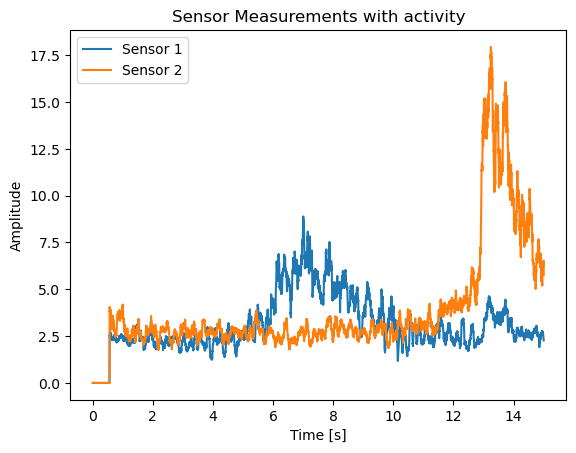

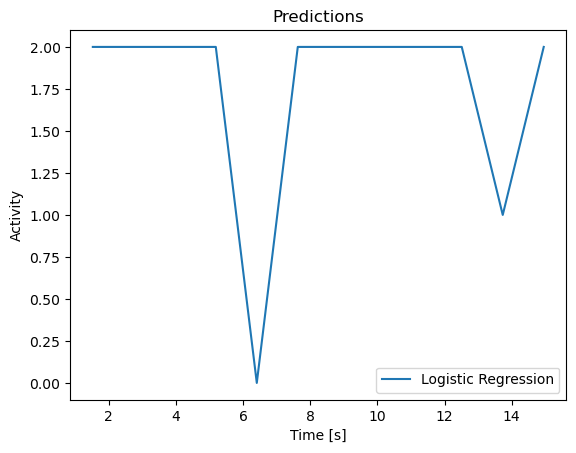

In [96]:
for filename in os.listdir(folder_path):
    if filename == "BevægelseHorisontaltFlexEx.npz":
        data = np.load(os.path.join(folder_path, filename))

# Plot the sensors from data
data = data['data']
timestamp = data[:, 0]
sensor1 = filter.array_run(data[:, 1], test)
sensor2 = filter.array_run(data[:, 2], test)
up = data[:, 3]
down = data[:, 4]
diff_threshold = 5

plt.plot(timestamp, sensor1, label='Sensor 1')
plt.plot(timestamp, sensor2, label='Sensor 2')
plt.legend()
plt.title('Sensor Measurements with activity')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()


# for every sample after 1000 in the data calculate the features
# for every 800 samples after 1000 in the data calculate the features
window_size = 100
features_test = []
timestamps_test = []
for i in range(1000, len(data), 800):
    rolling_mean_sensor1 = pd.Series(sensor1[:i]).rolling(window=window_size).mean().iloc[-1]
    rolling_mean_sensor2 = pd.Series(sensor2[:i]).rolling(window=window_size).mean().iloc[-1]
    rolling_var_sensor1 = pd.Series(sensor1[:i]).rolling(window=window_size).var().iloc[-1]
    rolling_var_sensor2 = pd.Series(sensor2[:i]).rolling(window=window_size).var().iloc[-1]
    diff_var = rolling_var_sensor1 - rolling_var_sensor2
    diff_mean = rolling_mean_sensor1 - rolling_mean_sensor2
    features_test.append([rolling_var_sensor1, rolling_var_sensor2, rolling_mean_sensor1, rolling_mean_sensor2, diff_var, diff_mean])
    timestamps_test.append(timestamp[i])

# Step 6: Load the trained model
clf = joblib.load('trained_model.pkl')

##RF_clf = joblib.load('trained_model_RF.pkl')

# Step 7: Predict the labels for the new data
y_pred = clf.predict(features_test)

#RF_y_pred = RF_clf.predict(features_test)

# Step 8: Plot the predictions
plt.plot(timestamps_test, y_pred)
#plt.plot(timestamps_test, RF_y_pred)
plt.title('Predictions')
plt.xlabel('Time [s]')
plt.ylabel('Activity')
plt.legend(['Logistic Regression', 'Random Forest'])
plt.show()
